<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/04w_0401_mon_A_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 04주차 A반

# 파이썬 설치 확인

In [2]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [3]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


# 코랩에서 한글 처리

In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.1 MB/s eta 0:00:00


In [5]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [168]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

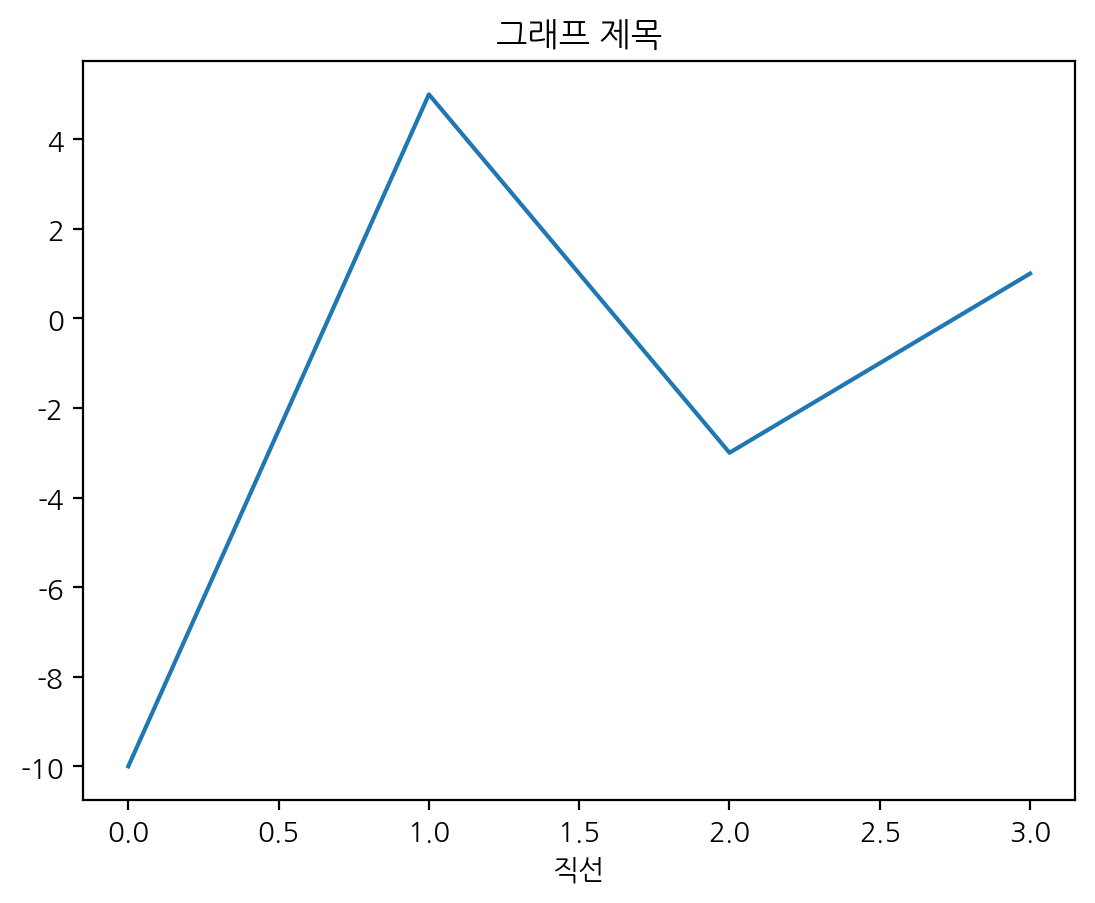

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [7]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.39 MiB/s, done.


In [15]:
s = pd.Series(['a', 'b', 'c', 'd'], index=[3, 2, 1, 4])
s

3    a
2    b
1    c
4    d
dtype: object

In [16]:
s.sort_index()

1    c
2    b
3    a
4    d
dtype: object

In [17]:
s.sort_values()

3    a
2    b
1    c
4    d
dtype: object

In [18]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150],
                  columns=['A'])
df

,A
100,1
29,2
234,3
1,4
150,5


In [19]:
df.sort_index()

,A
1,4
29,2
100,1
150,5
234,3


In [21]:
df.sort_values('A')

,A
100,1
29,2
234,3
1,4
150,5


In [26]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
4,5,2,25,80,65
18,19,5,89,68,87
2,3,1,45,86,78
5,6,2,50,89,98


In [27]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [28]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [29]:
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [31]:
(exam['nclass'] == 2)

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: nclass, dtype: bool

In [32]:
exam[exam['nclass'] == 2]
# exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [33]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [34]:
# 수학 점수가 50점을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [36]:
# 영어 점수가 80점 이상인 경우
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [37]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [42]:
exam[(exam.nclass == 1) & (exam.math >= 50)] # 괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [43]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [44]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [47]:
3 in [1, 2, 3, 4]

True

In [45]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3, 5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [50]:
exam[exam.nclass.isin([1, 3, 5])] # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


### 추출한 행으로 데이터 만들기


In [52]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [53]:
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [54]:
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [57]:
nclass1["math"].mean()

46.25

In [58]:
nclass2.english.mean()

84.25

In [59]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [60]:
# 2반 수학 점수 평균 구하기
nclass2.math.mean()

61.25

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [61]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [62]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [64]:
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


In [65]:
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


### (알아 두면 좋아요) 외부 변수를 이용해 추출하기

In [70]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


### (알아 두면 좋아요) 파이썬에서 사용하는 기호

| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |

| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

### 메소드 df.isin()

In [71]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [75]:
df.isin([0, 4]) # list나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,True,True


In [77]:
~df.isin([0, 4])

,num_legs,num_wings
falcon,True,True
dog,False,False


## 06-3 필요한 변수만 추출하기

In [78]:
exam["math"]

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [79]:
exam.math

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [81]:
exam[["math", "english"]]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98
4,25,80
5,50,89
6,80,90
7,90,78
8,20,98
9,50,98


In [82]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [84]:
exam.columns[3]

'english'

In [86]:
exam[exam.columns[3]]

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [87]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [91]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


### 변수 제거하기

In [92]:
exam.drop(columns="math")

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [93]:
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [94]:
exam.drop(columns=["math", 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [95]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [96]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [97]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [98]:
exam.drop(index=[2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [100]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [102]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


### pandas 함수 조합하기

In [106]:
exam.query('nclass == 1')['math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

In [105]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [108]:
# math가 50 이상인 행만 추출한 다음, 열 id, math 추출
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [107]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [110]:
exam[exam.math >= 50][['id', 'math']].head(3)

,id,math
0,1,50
1,2,60
5,6,50


### 가독성 있게 코드 줄 바꾸기

In [115]:
# math가 50 이상인 행만 추출
# id, math 추출
# 앞부분 10행 추출
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [116]:
exam.query('math >= 50')[['id', 'math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


## 06-4 순서대로 정렬하기

In [119]:
exam.sort_values('math', ascending=False).head(4)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45


In [120]:
# nclass, math 오름차순 정렬
exam.sort_values(['nclass', 'math']).head(10)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [122]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(10)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


df.sort_index()

In [125]:
exam.sort_index(ascending=False).head()

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65


### ## 06-5 파생변수 추가하기

In [127]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [128]:
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [129]:
# total 변수 추가
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam # 반영

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


#### 여러 파생변수 한 번에 추가하기

In [131]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [132]:
exam

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


### df.assign()에 np.where() 적용하기

In [134]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fail'))

,id,nclass,math,english,science,total,test
0,1,1,50,98,50,198,fail
1,2,1,60,97,60,217,pass
2,3,1,45,86,78,209,pass
3,4,1,30,98,58,186,fail
4,5,2,25,80,65,170,pass
5,6,2,50,89,98,237,pass
6,7,2,80,90,45,215,fail
7,8,2,90,78,25,193,fail
8,9,3,20,98,15,133,fail
9,10,3,50,98,45,193,fail


### 추가한 변수를 `pandas` 함수에 바로 활용하기

In [136]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
11,12,3,45,85,32
3,4,1,30,98,58
1,2,1,60,97,60
10,11,3,65,65,65


In [142]:
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


In [138]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


### lambda 이용해 데이터 프레임명 줄여 쓰기

In [143]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('data/exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [147]:
# long_name 대신 x 입력
exam.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [145]:
(lambda x, y: x + y)(30, 40)

70

In [146]:
f = lambda x, y: x + y
f(30, 40)

70

In [148]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')

In [151]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [154]:
round(3.4567876, 2)

3.46

In [152]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: round(x['total'] / 3, 2))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [166]:
# 데이터프레임의 소수점 이하 n자리 출력 설정
import pandas as pd
pd.set_option('display.precision', 2)

In [169]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [161]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: round(x['total'] / 3, 3))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000
1,2,1,60,97,60,217,72.333
2,3,1,45,86,78,209,69.667
3,4,1,30,98,58,186,62.000
4,5,2,25,80,65,170,56.667
5,6,2,50,89,98,237,79.000
6,7,2,80,90,45,215,71.667
7,8,2,90,78,25,193,64.333
8,9,3,20,98,15,133,44.333
9,10,3,50,98,45,193,64.333


In [160]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3)

KeyError: 'total'

## 정리하기

In [170]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')


## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거


## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186


## 종료